### Unzip the file

In [1]:
# unzip file
!unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
replace vehicles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### import libraries

In [92]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
import lightgbm
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')


### Loading dataset

In [4]:
df = pd.read_csv('vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
df.shape

(426880, 26)

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

The dataset consists of 426880 rows and 26 columns.

In [7]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [8]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


### Removing unwanted variables

In [9]:
df = df.drop(['id','url','region','region_url','VIN','image_url','description','county','posting_date','state','model'],axis=1)
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing values

In [10]:
# check missing values are present or not
df.isna().sum()/len(df) * 100

price            0.000000
year             0.282281
manufacturer     4.133714
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
lat              1.534155
long             1.534155
dtype: float64

We can observed that missing values are present in the data. We are going to remove variables which having missingt values more than 70% of data.And also we would drop missing values in the dataset.

In [11]:
df = df.drop(['size'],axis=1)
df.shape

(426880, 14)

In [12]:
df = df.dropna()
df.shape

(116612, 14)

In [13]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116612 entries, 31 to 426878
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         116612 non-null  int64  
 1   year          116612 non-null  float64
 2   manufacturer  116612 non-null  object 
 3   condition     116612 non-null  object 
 4   cylinders     116612 non-null  object 
 5   fuel          116612 non-null  object 
 6   odometer      116612 non-null  float64
 7   title_status  116612 non-null  object 
 8   transmission  116612 non-null  object 
 9   drive         116612 non-null  object 
 10  type          116612 non-null  object 
 11  paint_color   116612 non-null  object 
 12  lat           116612 non-null  float64
 13  long          116612 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 68.3 MB


In [14]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,lat,long
31,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,32.5920,-85.518900
32,27990,2012.0,gmc,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,32.5900,-85.480000
33,34590,2016.0,chevrolet,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,32.5900,-85.480000
34,35000,2019.0,toyota,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,32.6013,-85.443974
35,29990,2016.0,chevrolet,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,32.5900,-85.480000


### Data visualization

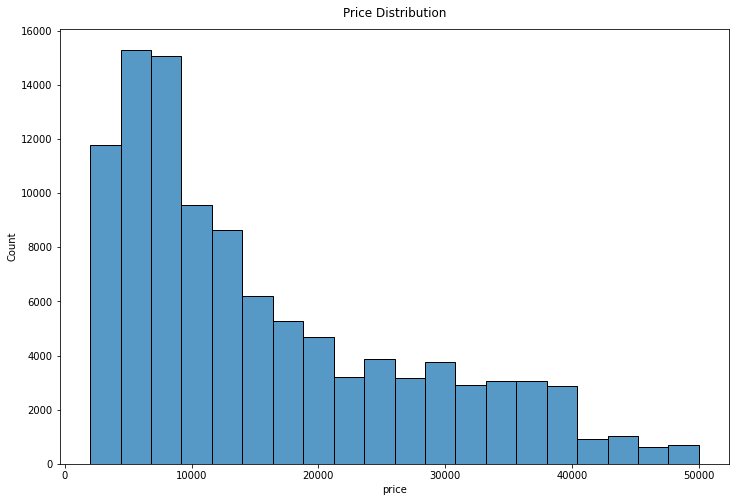

In [15]:
df_prc =df[(df.price >=2000) & (df.price <=50000)]
# Then plot the distriution 
f, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Price Distribution', pad=12)
sns.histplot(df_prc, x="price", stat='count', bins=20)

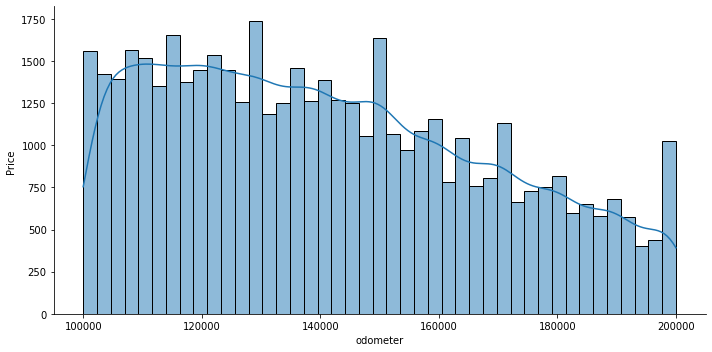

In [16]:
df_prc = df[(df.price >=2000) & (df.price <=50000)]
df_odo = df_prc[(df_prc.odometer >100000) & (df_prc.odometer <=200000)]
sns.displot(data=df_odo, x="odometer", aspect=2, height=5, kde=True)
plt.ylabel("Price ", fontsize=10);

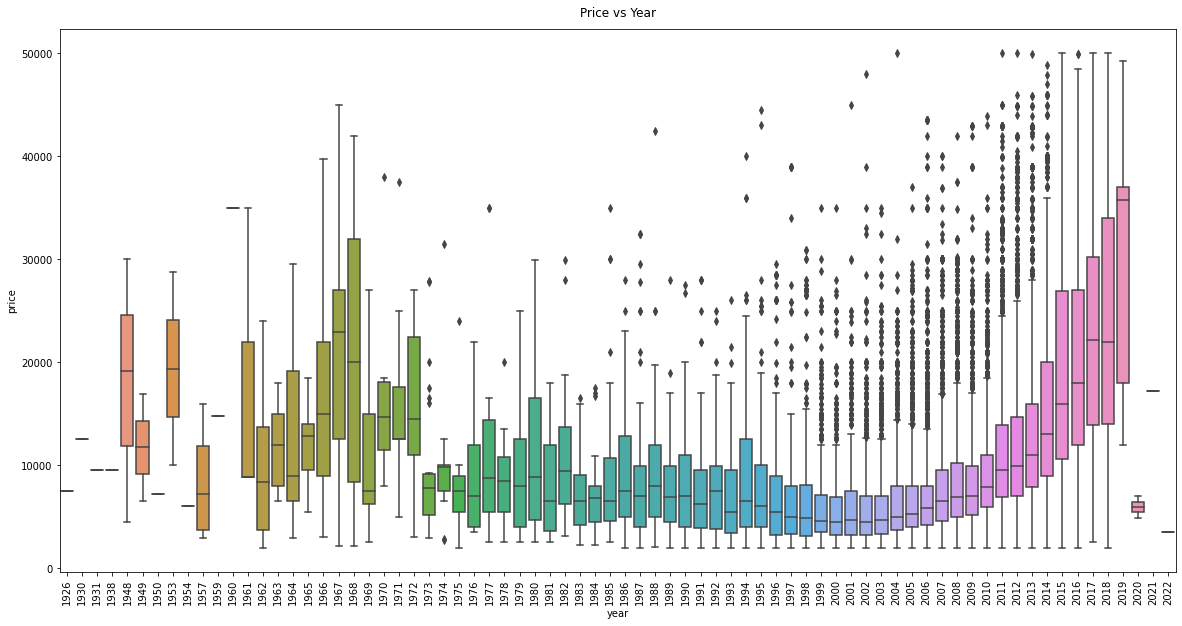

In [17]:
f, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Price vs Year', pad=12)
fig = sns.boxplot(x=df_odo.year.astype(int), y='price', data=df_odo)
plt.xticks(rotation=90);

Answer following questions

1. How price of cars is effected by the fuel

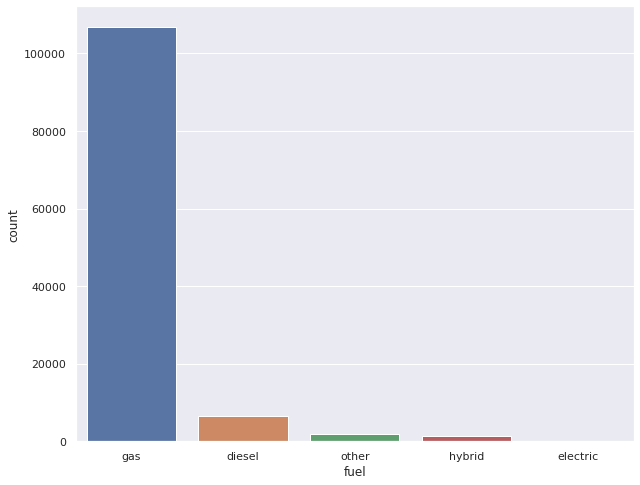

In [18]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x='fuel', data=df)

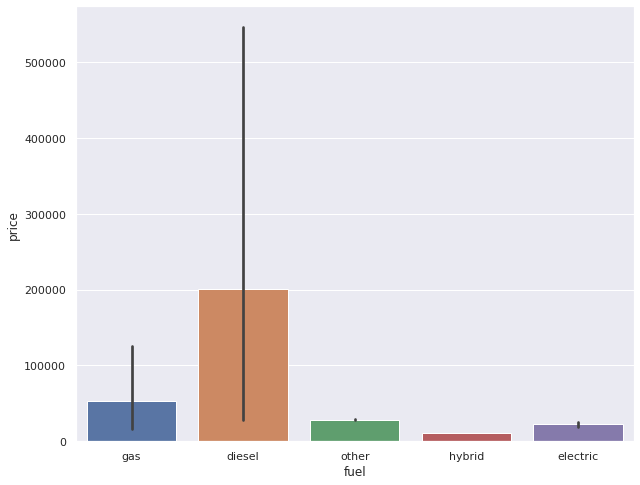

In [19]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x='fuel',y='price',data=df)

From the above plots, we observed that cars which use diesel fuel is costlier than other cars which use like gas, electric,other and hybrid. And also most of the cars are used gas fuel.

2. How price is related to different kinds of manufacturing

In [20]:
df.manufacturer.unique()

array(['ford', 'gmc', 'chevrolet', 'toyota', 'jeep', 'nissan', 'honda',
       'dodge', 'chrysler', 'ram', 'mercedes-benz', 'infiniti', 'bmw',
       'volkswagen', 'mazda', 'porsche', 'lexus', 'rover', 'ferrari',
       'audi', 'mitsubishi', 'kia', 'hyundai', 'fiat', 'acura',
       'cadillac', 'lincoln', 'jaguar', 'saturn', 'volvo', 'alfa-romeo',
       'buick', 'subaru', 'pontiac', 'mini', 'tesla', 'harley-davidson',
       'mercury', 'datsun', 'land rover', 'aston-martin', 'morgan'],
      dtype=object)

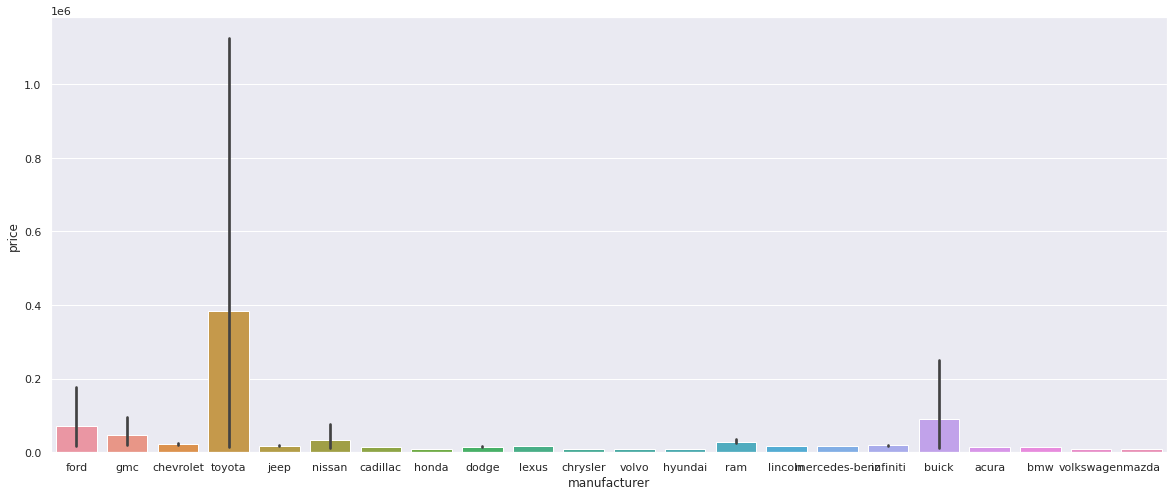

In [21]:
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x='manufacturer',y='price',data=df,order=['ford', 'gmc', 'chevrolet', 'toyota', 'jeep', 'nissan', 'cadillac',
       'honda', 'dodge', 'lexus', 'chrysler', 'volvo', 'hyundai', 'ram',
       'lincoln', 'mercedes-benz', 'infiniti', 'buick', 'acura', 'bmw',
       'volkswagen', 'mazda'])

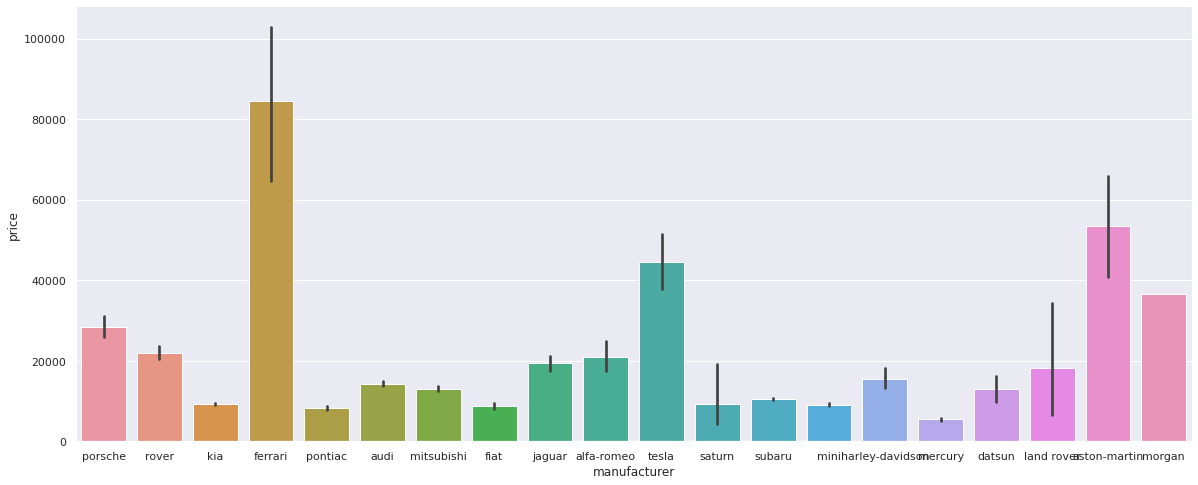

In [22]:
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x='manufacturer',y='price',data=df,order=['porsche', 'rover', 'kia', 'ferrari',
       'pontiac', 'audi', 'mitsubishi', 'fiat', 'jaguar', 'alfa-romeo',
       'tesla', 'saturn', 'subaru', 'mini', 'harley-davidson', 'mercury',
       'datsun', 'land rover', 'aston-martin', 'morgan'])

From the above above plots, we can conclude that Toyota cars are costlier than other manufactures. 

3. what is the common color for used car

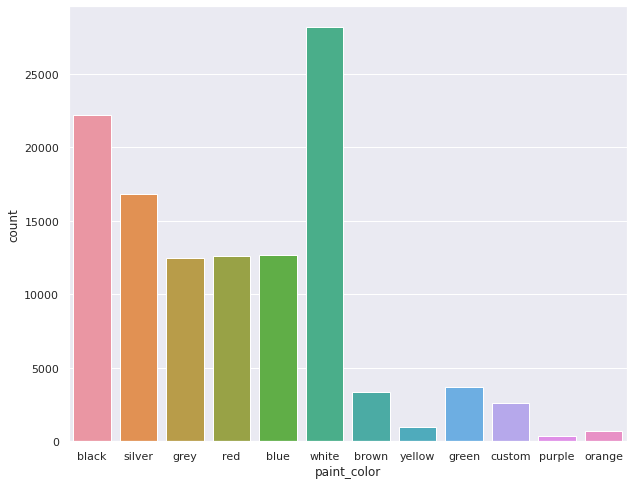

In [23]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x='paint_color', data=df)

From the above plot, we can conclude that common color for used car is white and followed by black.

4. How can we predict used car price

Encoding the categorical variables

In [25]:
# Get dummy variables
df_encoded = pd.get_dummies(df,columns=['condition','cylinders','manufacturer','fuel','title_status','transmission','drive','type','paint_color'])
# reset index
df_encoded = df_encoded.reset_index(drop=True)
df_encoded.head()

,price,year,odometer,lat,long,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_10 cylinders,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,...,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,15000,2013.0,128000.0,32.5920,-85.518900,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,27990,2012.0,68696.0,32.5900,-85.480000,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,34590,2016.0,29499.0,32.5900,-85.480000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,35000,2019.0,43000.0,32.6013,-85.443974,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,29990,2016.0,17302.0,32.5900,-85.480000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [26]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116612 entries, 0 to 116611
Columns: 103 entries, price to paint_color_yellow
dtypes: float64(4), int64(1), uint8(98)
memory usage: 15.3 MB


### Correlation matrix

Plot correlation matrix using heatmap to check how the features are correlated.

In [27]:
# Corrlation between the variables
df_encoded.corr()

,price,year,odometer,lat,long,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_10 cylinders,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,...,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
price,1.000000,-0.001394,0.000660,0.003353,-0.006727,0.001920,-0.000402,-0.001324,-0.000662,-0.000218,-0.000256,-0.000343,-0.000079,-0.000183,-0.002988,-0.000419,-0.002849,0.006192,-0.000201,-0.000433,-0.000069,-0.000004,-0.000433,-0.000694,0.000307,-0.000494,-0.001468,-0.000599,-0.000058,-0.000773,0.000028,-0.000175,0.000395,-0.000267,-0.000071,-0.001117,-0.000687,-0.000417,-0.000210,-0.000857,...,-0.002099,-0.000471,-0.000361,0.000927,-0.000296,-0.000214,-0.000113,-0.000663,-0.000503,0.001511,-0.001171,-0.000895,0.003046,-0.003047,-0.000145,-0.002314,-0.000149,-0.000664,-0.000980,-0.000908,-0.000701,-0.000258,-0.000491,0.010757,-0.002482,-0.000926,-0.000681,-0.000727,-0.001444,-0.001441,-0.000744,-0.000639,-0.000775,-0.001133,-0.000297,-0.000232,-0.001357,0.006234,0.000039,-0.000351
year,-0.001394,1.000000,-0.121849,-0.017176,0.045622,0.039175,-0.198708,-0.021908,0.089139,0.013423,-0.037250,0.006593,-0.018691,0.003289,0.105183,-0.015790,0.073138,-0.177879,-0.021187,0.014431,-0.012011,-0.001573,0.018972,0.008730,-0.019731,-0.020594,-0.057207,0.000251,-0.045956,0.016089,-0.012032,0.006648,-0.050236,0.025788,-0.008009,0.002207,0.045581,0.040080,-0.021113,0.015797,...,-0.042457,0.025151,0.072371,-0.031292,0.031492,-0.113793,-0.033259,0.056221,0.003051,-0.000216,-0.273004,0.229044,0.130429,0.098167,-0.260796,0.070733,-0.023408,-0.166420,-0.125383,0.022365,0.006027,-0.057157,0.049509,0.017716,0.039351,-0.024781,0.031683,0.009940,0.074910,-0.044292,-0.048510,-0.081766,-0.128971,0.035497,-0.053335,-0.034581,-0.057617,0.031916,0.085163,-0.083540
odometer,0.000660,-0.121849,1.000000,0.001574,-0.009015,-0.011939,0.085609,-0.004265,-0.022948,-0.019047,0.023779,-0.004314,-0.000346,-0.008623,-0.010421,0.009472,-0.012084,0.023101,-0.001069,-0.000622,-0.005696,-0.002565,-0.003830,-0.008881,0.005619,-0.007990,0.001276,-0.000917,-0.001504,-0.016192,-0.005578,-0.007897,0.015155,0.009163,0.001599,0.018708,-0.002512,-0.015508,-0.003197,-0.012763,...,-0.020067,0.002494,-0.032844,0.011647,-0.006680,0.020938,0.046889,-0.023502,0.000462,0.077169,0.025163,-0.116928,0.010585,-0.000882,-0.011313,0.022047,0.003477,-0.021180,-0.040386,-0.000685,0.014764,0.019998,-0.039909,-0.010428,-0.009172,0.041431,-0.002067,0.006897,-0.019093,0.009834,0.008460,0.010394,0.014461,0.005645,-0.005079,0.000666,-0.003221,0.006438,-0.007077,-0.007413
lat,0.003353,-0.017176,0.001574,1.000000,-0.036147,-0.003674,0.021939,0.019707,-0.036392,-0.007436,0.001897,-0.034408,0.001189,-0.002482,0.048124,0.003275,-0.021794,-0.019517,0.000853,-0.012114,-0.003781,-0.008307,0.016017,-0.018466,0.022964,-0.012204,0.021430,0.002373,-0.004211,-0.006372,0.002268,

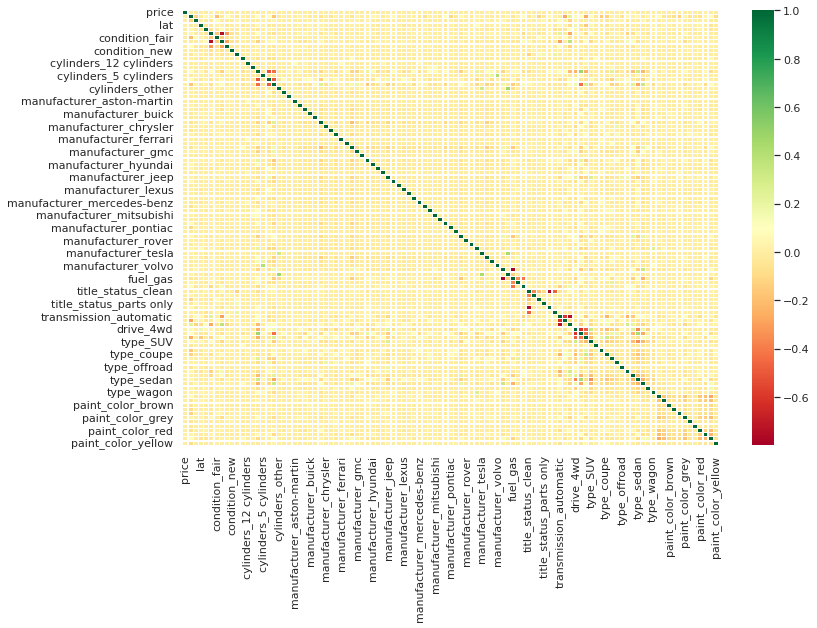

In [28]:
# Correlation plot
plt.figure(figsize = (12,8))
df_corr = df_encoded.corr()
sns.heatmap(df_corr,fmt = "", cmap = "RdYlGn", linewidth = 0.30)
plt.show()

It seems features have less or no correlation between them.

### Split the data

In [32]:
X = df_encoded.drop('price',axis=1)
Y = df_encoded.price
# Split the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

print(f'X_train shape is {X_train.shape}')
print(f'X_test shape is {X_test.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_test shape is {y_test.shape}')

X_train shape is (93289, 102)
X_test shape is (23323, 102)
y_train shape is (93289,)
y_test shape is (23323,)


Normalizing the data

In [59]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

### Building predictive models

### Linear Regression Model

In [60]:
## Linear regression model
lr = LinearRegression()

## fitting the model
lr.fit(X_train_s,y_train)

LinearRegression()

In [86]:
score = lr.score(X_train_s,y_train)
print(f'Accuracy for linear regression model is {score}')

Accuracy for linear regression is 0.0004848140211964891


In [90]:
lr_pred = lr.predict(X_test)
lr_pred

array([-7.54933606e+09, -1.41275397e+10, -1.48323528e+10, ...,
       -1.66055992e+10, -1.35362202e+10, -1.13216061e+10])

In [98]:
mse = mean_squared_error(y_test,lr_pred)
rmse = np.sqrt(mse)
print(f'Root mean squared error for linear regression model is {rmse}')

Root mean squared error for linear regression model is 28059973476.08717


### Lasso regularization model

In [62]:
## lasso model
lasso =Lasso(alpha=0.5)

lasso.fit(X_train_s,y_train)

Lasso(alpha=0.5)

In [63]:
score = lasso.score(X_train_s,y_train)
print(f'Accuracy for lasso model is {score}')

0.00048527256500785487

In [88]:
lasso_pred = lasso.predict(X_test)
lasso_pred

array([-7.09317013e+09, -1.32560306e+10, -1.39165724e+10, ...,
       -1.55775187e+10, -1.27020564e+10, -1.06274422e+10])

In [99]:
mse = mean_squared_error(y_test,lasso_pred)
rmse = np.sqrt(mse)
print(f'Root mean squared error for lasso model is {rmse}')

Root mean squared error for lasso model is 26297830759.381348


### LightGBM model

In [79]:
### lightGBM model
lgbm = lightgbm.LGBMRegressor(learning_rate=0.4,n_estimators=80,reg_alpha=0.02,random_state=423)

In [80]:
lgbm.fit(X_train_s,y_train)

LGBMRegressor(learning_rate=0.4, n_estimators=80, random_state=423,
              reg_alpha=0.02)

In [85]:
score = lgbm.score(X_train_s,y_train)
print(f'Accuracy for lightGBM model is {score}')

Accuracy for lightGBM is 0.8071135344356644


In [82]:
lgbm_pred = lgbm.predict(X_test_s)
lgbm_pred

array([16665.52841911, 11609.83411837, 12804.66297447, ...,
        4373.13748368, 13067.62748604, 18018.00713414])

In [102]:
mse = mean_squared_error(y_test,lgbm_pred)
rmse = np.sqrt(mse)
print(f'Root mean squared error for lightgbm model is {rmse}')

Root mean squared error for lightgbm model is 24499671.531292748


### Random Forest model

In [93]:
rf = RandomForestRegressor()


In [94]:
rf.fit(X_train_s,y_train)

RandomForestRegressor()

In [95]:
score = rf.score(X_train_s,y_train)
print(f'Accuracy for random forest model is {score}')

Accuracy for random forest model is 0.784146221158329


In [96]:
rf_pred = rf.predict(X_test_s)
rf_pred

array([ 1102.38      , 12589.38      , 13520.06      , ...,
        5241.42      , 20877.25      , 10667.51277778])

In [101]:
mse = mean_squared_error(y_test,rf_pred)
rmse = np.sqrt(mse)
print(f'Root mean squared error for random forest model is {rmse}')

Root mean squared error for random forest model is 24784687.862064786


Comparison of different models

In [104]:
model = ['Linear Regression','Lasso','LightGBM','Random Forest']
R_square = [0.000484, 0.000485, 0.807, 0.784]
rmse = [2.805e+10, 2.629e+10, 2.449e+10, 2.4783+10]

results = pd.DataFrame(model,columns=['Model'])
results['R^2'] = R_square
results['RMSE'] = rmse

results


,Model,R^2,RMSE
0,Linear Regression,0.000484,2.805000e+10
1,Lasso,0.000485,2.629000e+10
2,LightGBM,0.807000,2.449000e+10
3,Random Forest,0.784000,1.247830e+01


After comparing different models, we can conclude that lightGBM model is performing well compared to other models.

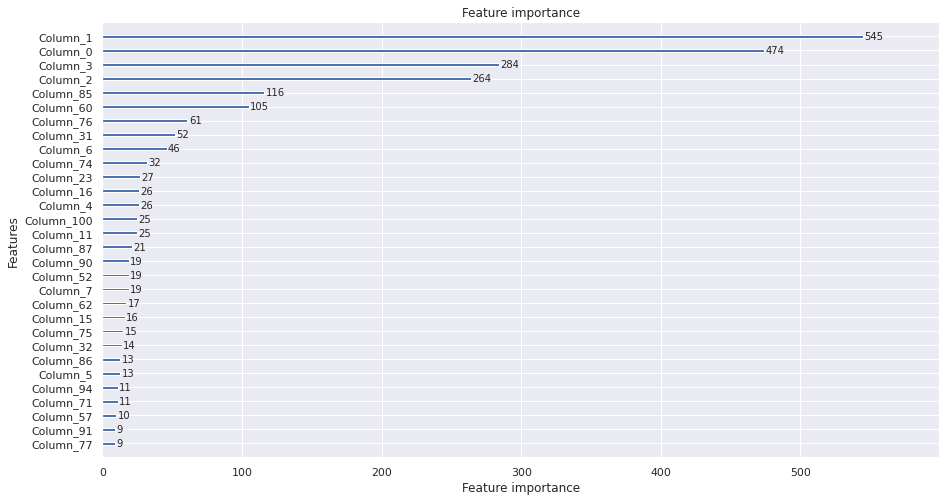

In [109]:
## Feature importance using LightGBM

lightgbm.plot_importance(lgbm,max_num_features=30,importance_type="split",figsize=(15,8))